<a href="https://colab.research.google.com/github/Anthonyyoyo/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/AnthonyG_LS_DS_114_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

#Cross Review

In [1]:
import pandas as pd

df = pd.DataFrame({'Animal': ['cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog'],
                  'Country': ['USA', 'Canada', 'Canada', 'Canada', 'USA', 'Canada', 'USA', 'USA'],
                  'Gender': ['male', 'female', 'male', 'male', 'male', 'male', 'female', 'female'],
                  'Cat_integer': [1, 1, 0, 1, 0, 1, 0, 0]})
df.head()

Animal Country  Gender  Cat_integer
0    cat     USA    male            1
1    cat  Canada  female            1
2    dog  Canada    male            0
3    cat  Canada    male            1
4    dog     USA    male            0

In [2]:
pd.crosstab(df['Animal'], df['Country'])

Country  Canada  USA
Animal              
cat           3    1
dog           1    3

In [3]:
pd.crosstab(df['Country'], df['Gender'])

Gender   female  male
Country              
Canada        1     3
USA           2     2

In [4]:
pd.crosstab(df['Country'], df['Gender'], normalize='columns')

Gender     female  male
Country                
Canada   0.333333   0.6
USA      0.666667   0.4

In [5]:
pd.crosstab(df['Country'], df['Gender'], normalize='index')

Gender   female  male
Country              
Canada     0.25  0.75
USA        0.50  0.50

In [6]:
pd.crosstab(df['Country'], df['Gender'], normalize=True)

Gender   female   male
Country               
Canada    0.125  0.375
USA       0.250  0.250

In [7]:
pd.crosstab(df['Country'], [df['Gender'], df['Animal']])

Gender  female     male    
Animal     cat dog  cat dog
Country                    
Canada       1   0    2   1
USA          0   2    1   1

In [8]:
#Adding margins
pd.crosstab(df['Country'], [df['Gender'], df['Animal']], margins = True)

Gender  female     male     All
Animal     cat dog  cat dog    
Country                        
Canada       1   0    2   1   4
USA          0   2    1   1   4
All          1   2    3   2   8

In [9]:
pd.crosstab(df['Country'], [df['Gender'], df['Animal']], margins = True, normalize='index')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


Gender  female         male      
Animal     cat   dog    cat   dog
Country                          
Canada   0.250  0.00  0.500  0.25
USA      0.000  0.50  0.250  0.25
All      0.125  0.25  0.375  0.25

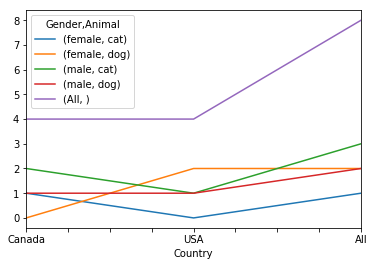

In [10]:
crosstab = pd.crosstab(df['Country'], [df['Gender'], df['Animal']], margins = True)

crosstab.plot()

Country        Canada  USA  All
Gender Animal                  
female cat          1    0    1
       dog          0    2    2
male   cat          2    1    3
       dog          1    1    2
All                 4    4    8


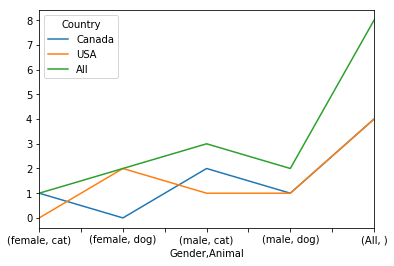

In [11]:
#Transposing

crosstab_1 = pd.crosstab(df['Country'], [df['Gender'], df['Animal']], margins = True).T
print(crosstab_1)

crosstab_1.plot()




# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [12]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-08-11 16:12:07--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.2’

LoanStats_2018Q4.cs     [                <=> ]  21.56M   911KB/s    in 25s     

2019-08-11 16:12:32 (892 KB/s) - ‘LoanStats_2018Q4.csv.zip.2’ saved [22606280]



In [13]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [14]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [15]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4404.61","4404.61","1701.34","1701.34","1195.39","505.95","0.0","0.0","0.0","Jul-2019","190.21","Aug-2019","Jul-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [16]:
import pandas as pd

#Set Pandas display option
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
print(df.shape)

df.head(20)

(128412, 144)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  NaN        NaN      10000        10000          10000.0   36 months   
1  NaN        NaN       4000         4000           4000.0   36 months   
2  NaN        NaN       5000         5000           5000.0   36 months   
3  NaN        NaN      23000        23000          23000.0   60 months   
4  NaN        NaN       8000         8000           8000.0   36 months   
5  NaN        NaN      32075        32075          32075.0   60 months   
6  NaN        NaN       9600         9600           9600.0   36 months   
7  NaN        NaN       2500         2500           2500.0   36 months   
8  NaN        NaN      30000        30000          30000.0   60 months   
9  NaN        NaN      12000        12000          12000.0   60 months   
10 NaN        NaN      10000        10000          10000.0   60 months   
11 NaN        NaN      16000        16000          16000.0   60 months   
12 NaN        NaN      16000        16000          16000.0   60 months   
13 NaN        NaN      15000        15000          14975.0   60 months   
14 NaN        NaN      13000        13000          13000.0   36 months   
15 NaN        NaN       9600         9600           9600.0   36 months   
16 NaN        NaN       3500         3500           3500.0   36 months   
17 NaN        NaN      30000        30000          30000.0   60 months   
18 NaN        NaN      16000        16000          16000.0   36 months   
19 NaN        NaN      24000        24000          24000.0   36 months   

   int_rate  installment grade sub_grade                         emp_title  \
0    10.33%       324.23     B        B1                               NaN   
1    23.40%       155.68     E        E1                          Security   
2    17.97%       180.69     D        D1                    Administrative   
3    20.89%       620.81     D        D4                          Operator   
4    23.40%       311.35     E        E1                           Manager   
5    11.80%       710.26     B        B4                Nursing Supervisor   
6    12.98%       323.37     B        B5                               NaN   
7    13.56%        84.92     C        C1                              Chef   
8    18.94%       777.23     D        D2                       Postmaster    
9    13.56%       276.49     C        C1                               NaN   
10   19.92%       264.50     D        D3                  Material Handler   
11   17.97%       406.04     D        D1         Instructional Coordinator   
12   26.31%       481.99     E        E4  Financial Relationship Associate   
13   14.47%       352.69     C        C2                               NaN   
14   23.40%       505.95     E        E1               Sale Representative   
15   23.40%       373.62     E        E1               driver coordinator    
16   20.89%       131.67     D        D4                     gas attendant   
17   26.31%       903.73     E        E4                       Casino Host   
18   14.47%       550.51     C        C2                         Carpenter   
19   15.02%       832.21     C        C3              MAINTENANCE PLANNER    

   emp_length home_ownership  annual_inc verification_status   issue_d  \
0    < 1 year       MORTGAGE    280000.0        Not Verified  Dec-2018   
1     3 years           RENT     90000.0     Source Verified  Dec-2018   
2     6 years       MORTGAGE     59280.0     Source Verified  Dec-2018   
3     5 years           RENT     68107.0     Source Verified  Dec-2018   
4   10+ years            OWN     43000.0     Source Verified  Dec-2018   
5   10+ years       MORTGAGE    150000.0        Not Verified  Dec-2018   
6         NaN       MORTGAGE     35704.0        Not Verified  Dec-2018   
7   10+ years           RENT     55000.0        Not Verified  Dec-2018   
8   10+ years       MORTGAGE     90000.0     Source Verified  Dec-2018   
9    < 1 year       MORTGAGE     40000.0        Not Verified  Dec-2018

In [17]:
df.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
128407 NaN        NaN      23000        23000          23000.0   36 months   
128408 NaN        NaN      10000        10000          10000.0   36 months   
128409 NaN        NaN       5000         5000           5000.0   36 months   
128410 NaN        NaN      10000        10000           9750.0   36 months   
128411 NaN        NaN      10000        10000          10000.0   36 months   

       int_rate  installment grade sub_grade             emp_title emp_length  \
128407   15.02%       797.53     C        C3        Tax Consultant  10+ years   
128408   15.02%       346.76     C        C3        security guard    5 years   
128409   13.56%       169.83     C        C1          Payoff Clerk  10+ years   
128410   11.06%       327.68     B        B3                   NaN        NaN   
128411   16.91%       356.08     C        C5  Key Accounts Manager    2 years   

       home_ownership  annual_inc verification_status   issue_d  loan_status  \
128407       MORTGAGE     75000.0     Source Verified  Oct-2018  Charged Off   
128408       MORTGAGE     38000.0        Not Verified  Oct-2018      Current   
128409       MORTGAGE     35360.0        Not Verified  Oct-2018      Current   
128410           RENT     44400.0     Source Verified  Oct-2018      Current   
128411           RENT     80000.0        Not Verified  Oct-2018      Current   

       pymnt_plan  url  desc             purpose                    title  \
128407          n  NaN   NaN  debt_consolidation       Debt consolidation   
128408          n  NaN   NaN  debt_consolidation       Debt consolidation   
128409          n  NaN   NaN  debt_consolidation       Debt consolidation   
128410          n  NaN   NaN         credit_card  Credit card refinancing   
128411          n  NaN   NaN               other                    Other   

       zip_code addr_state    dti  delinq_2yrs earliest_cr_line  \
128407    352xx         AL  20.95            1         Aug-1985   
128408    443xx         OH  13.16            3         Jul-1982   
128409    381xx         TN  11.30            1         Jun-2006   
128410    980xx         WA  11.78            0         Oct-2008   
128411    021xx         MA  17.72            1         Sep-2006   

        inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
128407               2                    22.0                     NaN   
128408               0                     6.0                     NaN   
128409               0                    21.0                     NaN   
128410               2                    40.0                     NaN   
128411               0                    14.0                     NaN   

        open_acc  pub_rec  revol_bal revol_util  total_acc  \
128407        12        0      22465      43.6%         28   
128408        11        0       5634      37.1%         16   
128409         9        0       2597      27.3%         15   
128410        15        0       6269      13.1%         25   
128411        17        0       1942      30.8%         31   

       initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
128407                   w       0.00           0.00      1547.08   
128408                   w    7902.84        7902.84      3112.50   
128409                   f    3932.69        3932.69      1524.70   
128410                   f    7800.53        7605.52      2933.76   
128411                   w    7950.71        7950.71      3195.33   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
128407          1547.08          1025.67         521.41                 0.0   
128408          3112.50          2097.16        1015.34                 0.0   
128409          1524.70          1067.31         457.39                 0.0   
128410          2860.42          2199.47         734.29                 0.0   
128411          3195.33          2049.29        1146.04                 0.0  

In [18]:
df.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
hardship_dpd                                  128409
deferral_term                                 128409
hardship_amount                               128409
hardship_start_date                           128409
hardship_end_date                             128409
payment_plan_start_date                       128409
hardship_length                               128409
orig_projected_additional_accrued_interest    128409
hardship_loan_status                          128409
hardship_reason                               128409
hardship_payoff_balance_amount                128409
hardship_last_payment_amount                  128409
hardship_type                                 128409
hardship_status                               128409
settlement_percentage                         

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [19]:
#Objects represents strings
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [20]:
df.drop(columns = ['id', 'member_id', 'desc', 'url'], axis='columns')

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           10000        10000     10000.000000   36 months   10.33%   
1            4000         4000      4000.000000   36 months   23.40%   
2            5000         5000      5000.000000   36 months   17.97%   
3           23000        23000     23000.000000   60 months   20.89%   
4            8000         8000      8000.000000   36 months   23.40%   
5           32075        32075     32075.000000   60 months   11.80%   
6            9600         9600      9600.000000   36 months   12.98%   
7            2500         2500      2500.000000   36 months   13.56%   
8           30000        30000     30000.000000   60 months   18.94%   
9           12000        12000     12000.000000   60 months   13.56%   
10          10000        10000     10000.000000   60 months   19.92%   
11          16000        16000     16000.000000   60 months   17.97%   
12          16000        16000     16000.000000   60 months   26.31%   
13          15000        15000     14975.000000   60 months   14.47%   
14          13000        13000     13000.000000   36 months   23.40%   
15           9600         9600      9600.000000   36 months   23.40%   
16           3500         3500      3500.000000   36 months   20.89%   
17          30000        30000     30000.000000   60 months   26.31%   
18          16000        16000     16000.000000   36 months   14.47%   
19          24000        24000     24000.000000   36 months   15.02%   
20          12000        12000     12000.000000   60 months   14.47%   
21          35000        35000     35000.000000   60 months   15.02%   
22          14000        14000     14000.000000   36 months   16.14%   
23          40000        40000     40000.000000   60 months   11.31%   
24          24000        24000     24000.000000   60 months   27.27%   
25          28000        28000     28000.000000   36 months   11.31%   
26           7075         7075      7075.000000   36 months   23.40%   
27           8000         8000      8000.000000   36 months   10.33%   
28           4000         4000      4000.000000   36 months   18.94%   
29          24000        24000     24000.000000   60 months   11.31%   
30          25000        25000     25000.000000   60 months   16.14%   
31          10400        10400     10400.000000   36 months   12.98%   
32           7500         7500      7475.000000   36 months   11.80%   
33           7000         7000      6975.000000   36 months   10.72%   
34          25000        25000     25000.000000   36 months   12.98%   
35           8000         8000      8000.000000   36 months   11.80%   
36          15000        15000     15000.000000   60 months   14.47%   
37           5000         5000      5000.000000   36 months   10.72%   
38           4000         4000      4000.000000   36 months   11.80%   
39           1250         1250      1250.000000   36 months   23.40%   
40          30000        30000     30000.000000   60 months   20.89%   
41          35000        35000     35000.000000   60 months   19.92%   
42           3000         3000      3000.000000   36 months   10.33%   
43           1000         1000       975.000000   36 months    6.46%   
44          10000        10000     10000.000000   60 months   14.47%   
45           5000         5000      5000.000000   36 months   11.31%   
46          16500        16500     16500.000000   60 months   17.97%   
47           6000         6000      6000.000000   36 months   15.02%   
48           3000         3000      3000.000000   36 months   17.97%   
49          35000        35000     35000.000000   60 months   18.94%   
50           8800         8800      8800.000000   36 months   16.91%   
51          10500        10500     10500.000000   60 months   11.80%   
52          25000        25000     25000.000000   60 months   14.47%   
53           5500         5500      5500.000000   36 months   11.31%   
54          12000        12000     12000.000000 

In [21]:
#Why are the columns still there given that we have already dropped them? - save the drop function to a dataframe
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [22]:
df = df.drop(columns = ['id', 'member_id', 'desc', 'url'], axis='columns')
print(df.shape)

df.head()

(128412, 140)


loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0      10000        10000          10000.0   36 months   10.33%       324.23   
1       4000         4000           4000.0   36 months   23.40%       155.68   
2       5000         5000           5000.0   36 months   17.97%       180.69   
3      23000        23000          23000.0   60 months   20.89%       620.81   
4       8000         8000           8000.0   36 months   23.40%       311.35   

  grade sub_grade       emp_title emp_length home_ownership  annual_inc  \
0     B        B1             NaN   < 1 year       MORTGAGE    280000.0   
1     E        E1        Security    3 years           RENT     90000.0   
2     D        D1  Administrative    6 years       MORTGAGE     59280.0   
3     D        D4        Operator    5 years           RENT     68107.0   
4     E        E1         Manager  10+ years            OWN     43000.0   

  verification_status   issue_d        loan_status pymnt_plan  \
0        Not Verified  Dec-2018            Current          n   
1     Source Verified  Dec-2018            Current          n   
2     Source Verified  Dec-2018  Late (16-30 days)          n   
3     Source Verified  Dec-2018            Current          n   
4     Source Verified  Dec-2018            Current          n   

              purpose               title zip_code addr_state    dti  \
0  debt_consolidation  Debt consolidation    974xx         OR   6.15   
1  debt_consolidation  Debt consolidation    070xx         NJ  26.33   
2  debt_consolidation  Debt consolidation    490xx         MI  10.51   
3  debt_consolidation  Debt consolidation    672xx         KS   0.52   
4  debt_consolidation  Debt consolidation    357xx         AL  33.24   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            2         Jan-1996               0                    18.0   
1            0         Sep-2006               4                    59.0   
2            0         Apr-2011               0                     NaN   
3            0         Feb-1997               0                     NaN   
4            0         Jan-1995               0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN        14        0       9082        38%         23   
1                     NaN        15        0       5199      19.2%         20   
2                     NaN         8        0       4599      19.1%         13   
3                     NaN         5        0        976        13%         10   
4                   107.0         8        1       9019      81.3%         16   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w    8540.01        8540.01      1936.77          1936.77   
1                   w    3510.60        3510.60       926.28           926.28   
2                   w    4456.17        4456.17       895.96           895.96   
3                   w   21597.84       21597.84      3686.64          3686.64   
4                   w    7021.26        7021.26      1852.50          1852.50   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          1459.99         476.78                 0.0         0.0   
1           489.40         436.88                 0.0         0.0   
2           543.83         352.13                 0.0         0.0   
3          1402.16        2284.48                 0.0         0.0   
4           978.74         873.76                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                      0.0     Jul-2019           324.23     Jul-2019   
1                      0.0     Jul-2019           155.68     Jul-2019   
2                      0.0     Jun-2019           180.69     Jul-2019   
3                      0.0     Jul-2019           620.81     Jul-2019   
4                      0.0     Jul-2019   

In [23]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [24]:


type(df['int_rate'])

pandas.core.series.Series

In [25]:

df['int_rate']

0          10.33%
1          23.40%
2          17.97%
3          20.89%
4          23.40%
5          11.80%
6          12.98%
7          13.56%
8          18.94%
9          13.56%
10         19.92%
11         17.97%
12         26.31%
13         14.47%
14         23.40%
15         23.40%
16         20.89%
17         26.31%
18         14.47%
19         15.02%
20         14.47%
21         15.02%
22         16.14%
23         11.31%
24         27.27%
25         11.31%
26         23.40%
27         10.33%
28         18.94%
29         11.31%
30         16.14%
31         12.98%
32         11.80%
33         10.72%
34         12.98%
35         11.80%
36         14.47%
37         10.72%
38         11.80%
39         23.40%
40         20.89%
41         19.92%
42         10.33%
43          6.46%
44         14.47%
45         11.31%
46         17.97%
47         15.02%
48         17.97%
49         18.94%
50         16.91%
51         11.80%
52         14.47%
53         11.31%
54         14.47%
55        

In [0]:
# For loops are good but there are better options

# for int in df['int_rate']:
#   print(int)

Apply the function to the `int_rate` column

In [27]:
#How to remove a character from a string in python
int_rate = '15.02%'

int_rate[:-1]

'15.02'

In [28]:
int_list = ['15.02%', '13.56%', '16.91%']

int_list[0:2]

['15.02%', '13.56%']

In [29]:
int_rate.strip('%')

'15.02'

In [30]:
type(int_rate.strip('%'))

str

In [31]:
float(int_rate.strip('%'))

15.02

In [32]:
type(float(int_rate.strip('%')))

float

#List Comprehension Example


In [0]:
#This did not work and had to improvise, it brought error: Float does not have attribute str
# def remove_percent_to_float(string):
#   return float(string.strip('%'))


#Improvised:

def remove_percent_to_float(string):
  if isinstance(string, str):
    return string.strip('%')
  
   

In [34]:
int_list = ['15.02%', '13.56%', '16.91%']
[remove_percent_to_float(item) for item in int_list] #This is a list comprehension

['15.02', '13.56', '16.91']

# .apply() function

In [35]:


df['int_rate'] = df['int_rate'].apply(remove_percent_to_float)

df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0      10000        10000          10000.0   36 months    10.33       324.23   
1       4000         4000           4000.0   36 months    23.40       155.68   
2       5000         5000           5000.0   36 months    17.97       180.69   
3      23000        23000          23000.0   60 months    20.89       620.81   
4       8000         8000           8000.0   36 months    23.40       311.35   

  grade sub_grade       emp_title emp_length home_ownership  annual_inc  \
0     B        B1             NaN   < 1 year       MORTGAGE    280000.0   
1     E        E1        Security    3 years           RENT     90000.0   
2     D        D1  Administrative    6 years       MORTGAGE     59280.0   
3     D        D4        Operator    5 years           RENT     68107.0   
4     E        E1         Manager  10+ years            OWN     43000.0   

  verification_status   issue_d        loan_status pymnt_plan  \
0        Not Verified  Dec-2018            Current          n   
1     Source Verified  Dec-2018            Current          n   
2     Source Verified  Dec-2018  Late (16-30 days)          n   
3     Source Verified  Dec-2018            Current          n   
4     Source Verified  Dec-2018            Current          n   

              purpose               title zip_code addr_state    dti  \
0  debt_consolidation  Debt consolidation    974xx         OR   6.15   
1  debt_consolidation  Debt consolidation    070xx         NJ  26.33   
2  debt_consolidation  Debt consolidation    490xx         MI  10.51   
3  debt_consolidation  Debt consolidation    672xx         KS   0.52   
4  debt_consolidation  Debt consolidation    357xx         AL  33.24   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            2         Jan-1996               0                    18.0   
1            0         Sep-2006               4                    59.0   
2            0         Apr-2011               0                     NaN   
3            0         Feb-1997               0                     NaN   
4            0         Jan-1995               0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN        14        0       9082        38%         23   
1                     NaN        15        0       5199      19.2%         20   
2                     NaN         8        0       4599      19.1%         13   
3                     NaN         5        0        976        13%         10   
4                   107.0         8        1       9019      81.3%         16   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w    8540.01        8540.01      1936.77          1936.77   
1                   w    3510.60        3510.60       926.28           926.28   
2                   w    4456.17        4456.17       895.96           895.96   
3                   w   21597.84       21597.84      3686.64          3686.64   
4                   w    7021.26        7021.26      1852.50          1852.50   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          1459.99         476.78                 0.0         0.0   
1           489.40         436.88                 0.0         0.0   
2           543.83         352.13                 0.0         0.0   
3          1402.16        2284.48                 0.0         0.0   
4           978.74         873.76                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                      0.0     Jul-2019           324.23     Jul-2019   
1                      0.0     Jul-2019           155.68     Jul-2019   
2                      0.0     Jun-2019           180.69     Jul-2019   
3                      0.0     Jul-2019           620.81     Jul-2019   
4                      0.0     Jul-2019   

### Clean `emp_title`

Look at top 20 titles

In [36]:
df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

How often is `emp_title` null?

In [37]:
df['emp_title'].isna().sum()

20947

Clean the title and handle missing values

In [38]:
import numpy as np

type(np.NaN)

float

In [39]:

examples = ['owner', 'Supervisor', 'Project Manager', np.NaN]

#We get an error: 'float' object has no attribute 'strip'. This means we can only strip string items only. np.NaN is a float

def clean_title(item):
  if isinstance(item, str):
    return item.strip().title()
  else:
    return 'Unknown'

[clean_title(item) for item in examples]


['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [40]:
df['emp_title'] = df['emp_title'].apply(clean_title)

df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0      10000        10000          10000.0   36 months    10.33       324.23   
1       4000         4000           4000.0   36 months    23.40       155.68   
2       5000         5000           5000.0   36 months    17.97       180.69   
3      23000        23000          23000.0   60 months    20.89       620.81   
4       8000         8000           8000.0   36 months    23.40       311.35   

  grade sub_grade       emp_title emp_length home_ownership  annual_inc  \
0     B        B1         Unknown   < 1 year       MORTGAGE    280000.0   
1     E        E1        Security    3 years           RENT     90000.0   
2     D        D1  Administrative    6 years       MORTGAGE     59280.0   
3     D        D4        Operator    5 years           RENT     68107.0   
4     E        E1         Manager  10+ years            OWN     43000.0   

  verification_status   issue_d        loan_status pymnt_plan  \
0        Not Verified  Dec-2018            Current          n   
1     Source Verified  Dec-2018            Current          n   
2     Source Verified  Dec-2018  Late (16-30 days)          n   
3     Source Verified  Dec-2018            Current          n   
4     Source Verified  Dec-2018            Current          n   

              purpose               title zip_code addr_state    dti  \
0  debt_consolidation  Debt consolidation    974xx         OR   6.15   
1  debt_consolidation  Debt consolidation    070xx         NJ  26.33   
2  debt_consolidation  Debt consolidation    490xx         MI  10.51   
3  debt_consolidation  Debt consolidation    672xx         KS   0.52   
4  debt_consolidation  Debt consolidation    357xx         AL  33.24   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            2         Jan-1996               0                    18.0   
1            0         Sep-2006               4                    59.0   
2            0         Apr-2011               0                     NaN   
3            0         Feb-1997               0                     NaN   
4            0         Jan-1995               0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN        14        0       9082        38%         23   
1                     NaN        15        0       5199      19.2%         20   
2                     NaN         8        0       4599      19.1%         13   
3                     NaN         5        0        976        13%         10   
4                   107.0         8        1       9019      81.3%         16   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w    8540.01        8540.01      1936.77          1936.77   
1                   w    3510.60        3510.60       926.28           926.28   
2                   w    4456.17        4456.17       895.96           895.96   
3                   w   21597.84       21597.84      3686.64          3686.64   
4                   w    7021.26        7021.26      1852.50          1852.50   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          1459.99         476.78                 0.0         0.0   
1           489.40         436.88                 0.0         0.0   
2           543.83         352.13                 0.0         0.0   
3          1402.16        2284.48                 0.0         0.0   
4           978.74         873.76                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                      0.0     Jul-2019           324.23     Jul-2019   
1                      0.0     Jul-2019           155.68     Jul-2019   
2                      0.0     Jun-2019           180.69     Jul-2019   
3                      0.0     Jul-2019           620.81     Jul-2019   
4                      0.0     Jul-2019   

In [41]:
df['emp_title'].value_counts(dropna=False).head(20)

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [42]:
df['emp_title'].value_counts(dropna=False)



#df['emp_title'].value_counts(dropna=False).sum()
#It does not give the right answer

Unknown                                     20947
Teacher                                      2557
Manager                                      2395
Registered Nurse                             1418
Driver                                       1258
Supervisor                                   1160
Truck Driver                                  920
Rn                                            834
Office Manager                                805
Sales                                         803
General Manager                               791
Project Manager                               720
Owner                                         625
Director                                      523
Operations Manager                            518
Sales Manager                                 500
Police Officer                                440
Nurse                                         425
Technician                                    420
Engineer                                      412


#How many unique employment titles

In [43]:
#No. of unique job titles
df['emp_title'].value_counts(dropna=False).reset_index().shape

(34902, 2)

In [44]:
df.describe(exclude = 'number')

term int_rate   grade sub_grade emp_title emp_length  \
count       128412   128412  128412    128412    128412     116708   
unique           2       46       7        35     34902         11   
top      36 months    13.56       A        A4   Unknown  10+ years   
freq         88179     6975   38011      9770     20947      38826   

       home_ownership verification_status   issue_d loan_status pymnt_plan  \
count          128412              128412    128412      128412     128412   
unique              4                   3         3           7          1   
top          MORTGAGE        Not Verified  Oct-2018     Current          n   
freq            63490               58350     46305      112313     128412   

                   purpose               title zip_code addr_state  \
count               128412              128412   128412     128412   
unique                  12                  12      880         50   
top     debt_consolidation  Debt consolidation    112xx         CA   
freq                 70603               70603     1370      17879   

       earliest_cr_line revol_util initial_list_status last_pymnt_d  \
count            128412     128256              128412       128253   
unique              644       1074                   2           10   
top            Aug-2006         0%                   w     Jul-2019   
freq               1130       1132              114498        99427   

       next_pymnt_d last_credit_pull_d application_type  \
count        115848             128411           128412   
unique            4                 11                2   
top        Aug-2019           Jul-2019       Individual   
freq          89985             119250           111630   

       verification_status_joint sec_app_earliest_cr_line hardship_flag  \
count                      14848                    16782        128412   
unique                         3                      573             2   
top                 Not Verified                 Aug-2006             N   
freq                        6360                      155        128410   

                          hardship_type hardship_reason hardship_status  \
count                                 3               3               3   
unique                                1               2               2   
top     INTEREST ONLY-3 MONTHS DEFERRAL    UNEMPLOYMENT          ACTIVE   
freq                                  3               2               2   

       hardship_start_date hardship_end_date payment_plan_start_date  \
count                    3                 3                       3   
unique                   2                 2                       2   
top               Jul-2019          Oct-2019                Aug-2019   
freq                     2                 2                       2   

       hardship_loan_status debt_settlement_flag debt_settlement_flag_date  \
count                     3               128412                        62   
unique                    3                    2                         5   
top         In Grace Period                    N                  Jul-2019   
freq                      1               128350                        27   

       settlement_status settlement_date  
count                 62              62  
unique                 3               6  
top               ACTIVE        May-2019  
freq                  56              20

In [45]:
df['emp_title'].value_counts(dropna=False).unique()

array([20947,  2557,  2395,  1418,  1258,  1160,   920,   834,   805,
         803,   791,   720,   625,   523,   518,   500,   440,   425,
         420,   412,   409,   398,   391,   383,   357,   355,   352,
         335,   302,   293,   284,   283,   278,   267,   264,   254,
         249,   248,   237,   226,   221,   215,   214,   212,   209,
         200,   196,   191,   187,   186,   185,   184,   183,   179,
         176,   174,   172,   171,   169,   168,   165,   164,   162,
         161,   159,   157,   153,   151,   150,   149,   140,   136,
         135,   131,   129,   128,   127,   125,   123,   120,   119,
         116,   115,   114,   112,   111,   108,   107,   106,   105,
         101,   100,    99,    98,    96,    93,    92,    90,    89,
          88,    87,    86,    85,    84,    81,    80,    79,    78,
          77,    76,    75,    74,    73,    72,    71,    70,    69,
          68,    67,    66,    65,    64,    63,    62,    61,    60,
          59,    58,

In [46]:
df['emp_title'].describe(exclude='number')

count      128412
unique      34902
top       Unknown
freq        20947
Name: emp_title, dtype: object

In [47]:
df['emp_title'].nunique()

34902

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [48]:
df.emp_title_manager = True

#dir(df)

print(df.emp_title_manager)

True


## #You have to use square brackets column syntax when creating new dataframe column

In [49]:
df['emp_title_manager'] = True
#print(df['emp_title_manager'])

print(df.emp_title_manager)

True


In [0]:
# title_list = ['manager', 'sales manager', 'supervisor']
# for item in title_list:
#   print(item.contains['manager'])

In [51]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0      10000        10000          10000.0   36 months    10.33       324.23   
1       4000         4000           4000.0   36 months    23.40       155.68   
2       5000         5000           5000.0   36 months    17.97       180.69   
3      23000        23000          23000.0   60 months    20.89       620.81   
4       8000         8000           8000.0   36 months    23.40       311.35   

  grade sub_grade       emp_title emp_length home_ownership  annual_inc  \
0     B        B1         Unknown   < 1 year       MORTGAGE    280000.0   
1     E        E1        Security    3 years           RENT     90000.0   
2     D        D1  Administrative    6 years       MORTGAGE     59280.0   
3     D        D4        Operator    5 years           RENT     68107.0   
4     E        E1         Manager  10+ years            OWN     43000.0   

  verification_status   issue_d        loan_status pymnt_plan  \
0        Not Verified  Dec-2018            Current          n   
1     Source Verified  Dec-2018            Current          n   
2     Source Verified  Dec-2018  Late (16-30 days)          n   
3     Source Verified  Dec-2018            Current          n   
4     Source Verified  Dec-2018            Current          n   

              purpose               title zip_code addr_state    dti  \
0  debt_consolidation  Debt consolidation    974xx         OR   6.15   
1  debt_consolidation  Debt consolidation    070xx         NJ  26.33   
2  debt_consolidation  Debt consolidation    490xx         MI  10.51   
3  debt_consolidation  Debt consolidation    672xx         KS   0.52   
4  debt_consolidation  Debt consolidation    357xx         AL  33.24   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            2         Jan-1996               0                    18.0   
1            0         Sep-2006               4                    59.0   
2            0         Apr-2011               0                     NaN   
3            0         Feb-1997               0                     NaN   
4            0         Jan-1995               0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN        14        0       9082        38%         23   
1                     NaN        15        0       5199      19.2%         20   
2                     NaN         8        0       4599      19.1%         13   
3                     NaN         5        0        976        13%         10   
4                   107.0         8        1       9019      81.3%         16   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w    8540.01        8540.01      1936.77          1936.77   
1                   w    3510.60        3510.60       926.28           926.28   
2                   w    4456.17        4456.17       895.96           895.96   
3                   w   21597.84       21597.84      3686.64          3686.64   
4                   w    7021.26        7021.26      1852.50          1852.50   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          1459.99         476.78                 0.0         0.0   
1           489.40         436.88                 0.0         0.0   
2           543.83         352.13                 0.0         0.0   
3          1402.16        2284.48                 0.0         0.0   
4           978.74         873.76                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                      0.0     Jul-2019           324.23     Jul-2019   
1                      0.0     Jul-2019           155.68     Jul-2019   
2                      0.0     Jun-2019           180.69     Jul-2019   
3                      0.0     Jul-2019           620.81     Jul-2019   
4                      0.0     Jul-2019   

##DataFrame Filtering

In [52]:
condition = (df['emp_title_manager'] == True)
managers = df[condition]

print(managers.shape)

managers.head()

(17882, 141)


loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
4        8000         8000           8000.0   36 months    23.40       311.35   
21      35000        35000          35000.0   60 months    15.02       833.02   
30      25000        25000          25000.0   60 months    16.14       609.82   
35       8000         8000           8000.0   36 months    11.80       264.96   
46      16500        16500          16500.0   60 months    17.97       418.73   

   grade sub_grade           emp_title emp_length home_ownership  annual_inc  \
4      E        E1             Manager  10+ years            OWN     43000.0   
21     C        C3    Sr Sales Manager  10+ years       MORTGAGE    290000.0   
30     C        C4  Production Manager    5 years       MORTGAGE     45000.0   
35     B        B4     Program Manager    7 years       MORTGAGE     85000.0   
46     D        D1        Case Manager    5 years       MORTGAGE     37000.0   

   verification_status   issue_d loan_status pymnt_plan             purpose  \
4      Source Verified  Dec-2018     Current          n  debt_consolidation   
21     Source Verified  Dec-2018     Current          n  debt_consolidation   
30        Not Verified  Dec-2018  Fully Paid          n  debt_consolidation   
35        Not Verified  Dec-2018     Current          n         credit_card   
46            Verified  Dec-2018     Current          n  debt_consolidation   

                      title zip_code addr_state    dti  delinq_2yrs  \
4        Debt consolidation    357xx         AL  33.24            0   
21       Debt consolidation    656xx         MO   7.60            0   
30       Debt consolidation    703xx         LA  37.09            0   
35  Credit card refinancing    366xx         AL  23.61            0   
46       Debt consolidation    775xx         TX  52.09            0   

   earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
4          Jan-1995               0                     NaN   
21         Dec-2004               0                    29.0   
30         Sep-2003               0                     NaN   
35         Dec-1991               1                     NaN   
46         Oct-2001               1                     NaN   

    mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
4                    107.0         8        1       9019      81.3%   
21                     NaN        15        0      29416      93.7%   
30                     NaN         7        0       8901      36.8%   
35                     NaN        11        0      29038      47.2%   
46                     NaN         9        0      10606      82.9%   

    total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
4          16                   w    7021.26        7021.26   1852.50000   
21         33                   w   32554.98       32554.98   4954.31000   
30         21                   w       0.00           0.00  26653.16758   
35         29                   w    6854.40        6854.40   1581.89000   
46         18                   w   15430.80       15430.80   2528.86000   

    total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
4           1852.50           978.74         873.76                 0.0   
21          4954.31          2445.02        2509.29                 0.0   
30         26653.17         25000.00        1653.17                 0.0   
35          1581.89          1145.60         436.29                 0.0   
46          2528.86          1069.20        1459.66                 0.0   

    recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
4          0.0                      0.0     Jul-2019           311.35   
21         0.0                      0.0     Jul-2019           833.02   
30         0.0                      0.0     Apr-2019         24857.33   
35         0.0                      0.0     Jul-2019           264.96   
46         0.0                      0.0     Jul-2019   

In [0]:
# managers = df[df['emp_title'].str.contains('Manager')]

# print(managers.shape)
# managers.head()

In [54]:
plebians = df[df['emp_title_manager'] == False]

print(plebians.shape)

plebians.head()

(110530, 141)


loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0      10000        10000          10000.0   36 months    10.33       324.23   
1       4000         4000           4000.0   36 months    23.40       155.68   
2       5000         5000           5000.0   36 months    17.97       180.69   
3      23000        23000          23000.0   60 months    20.89       620.81   
5      32075        32075          32075.0   60 months    11.80       710.26   

  grade sub_grade           emp_title emp_length home_ownership  annual_inc  \
0     B        B1             Unknown   < 1 year       MORTGAGE    280000.0   
1     E        E1            Security    3 years           RENT     90000.0   
2     D        D1      Administrative    6 years       MORTGAGE     59280.0   
3     D        D4            Operator    5 years           RENT     68107.0   
5     B        B4  Nursing Supervisor  10+ years       MORTGAGE    150000.0   

  verification_status   issue_d        loan_status pymnt_plan  \
0        Not Verified  Dec-2018            Current          n   
1     Source Verified  Dec-2018            Current          n   
2     Source Verified  Dec-2018  Late (16-30 days)          n   
3     Source Verified  Dec-2018            Current          n   
5        Not Verified  Dec-2018            Current          n   

              purpose                    title zip_code addr_state    dti  \
0  debt_consolidation       Debt consolidation    974xx         OR   6.15   
1  debt_consolidation       Debt consolidation    070xx         NJ  26.33   
2  debt_consolidation       Debt consolidation    490xx         MI  10.51   
3  debt_consolidation       Debt consolidation    672xx         KS   0.52   
5         credit_card  Credit card refinancing    231xx         VA  22.21   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            2         Jan-1996               0                    18.0   
1            0         Sep-2006               4                    59.0   
2            0         Apr-2011               0                     NaN   
3            0         Feb-1997               0                     NaN   
5            0         Aug-2005               0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN        14        0       9082        38%         23   
1                     NaN        15        0       5199      19.2%         20   
2                     NaN         8        0       4599      19.1%         13   
3                     NaN         5        0        976        13%         10   
5                     NaN        17        0      19077        32%         24   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w    8540.01        8540.01      1936.77          1936.77   
1                   w    3510.60        3510.60       926.28           926.28   
2                   w    4456.17        4456.17       895.96           895.96   
3                   w   21597.84       21597.84      3686.64          3686.64   
5                   w   29646.85       29646.85      4230.02          4230.02   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          1459.99         476.78                 0.0         0.0   
1           489.40         436.88                 0.0         0.0   
2           543.83         352.13                 0.0         0.0   
3          1402.16        2284.48                 0.0         0.0   
5          2428.15        1801.87                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                      0.0     Jul-2019           324.23     Jul-2019   
1                      0.0     Jul-2019           155.68     Jul-2019   
2                      0.0     Jun-2019           180.69     Jul-2019   
3                      0.0     Jul-2019           620.81     

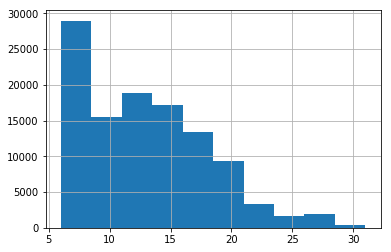

In [55]:
plebians_df = plebians['int_rate'].astype(float)

plebians_df.hist()

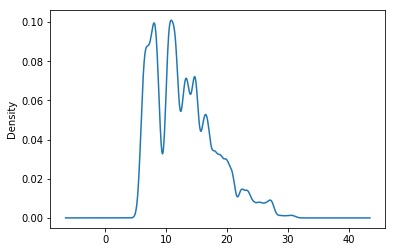

In [56]:
plebians_df.plot.density()

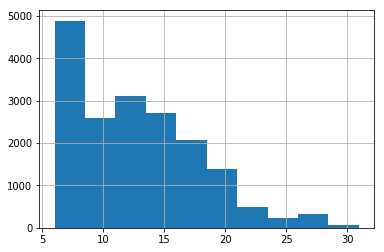

In [57]:

managers_df = managers['int_rate'].astype(float)

managers_df.hist()



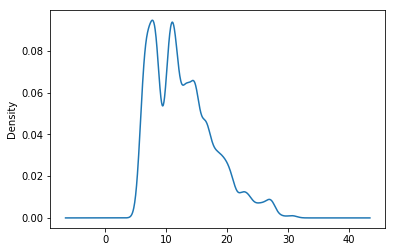

In [58]:
managers_df.plot.density()

In [59]:
managers_df.mean()

12.760582149647123

In [60]:
plebians_df.mean()

12.957292318828944

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [61]:
df['issue_d']

0         Dec-2018
1         Dec-2018
2         Dec-2018
3         Dec-2018
4         Dec-2018
5         Dec-2018
6         Dec-2018
7         Dec-2018
8         Dec-2018
9         Dec-2018
10        Dec-2018
11        Dec-2018
12        Dec-2018
13        Dec-2018
14        Dec-2018
15        Dec-2018
16        Dec-2018
17        Dec-2018
18        Dec-2018
19        Dec-2018
20        Dec-2018
21        Dec-2018
22        Dec-2018
23        Dec-2018
24        Dec-2018
25        Dec-2018
26        Dec-2018
27        Dec-2018
28        Dec-2018
29        Dec-2018
30        Dec-2018
31        Dec-2018
32        Dec-2018
33        Dec-2018
34        Dec-2018
35        Dec-2018
36        Dec-2018
37        Dec-2018
38        Dec-2018
39        Dec-2018
40        Dec-2018
41        Dec-2018
42        Dec-2018
43        Dec-2018
44        Dec-2018
45        Dec-2018
46        Dec-2018
47        Dec-2018
48        Dec-2018
49        Dec-2018
50        Dec-2018
51        Dec-2018
52        De

In [62]:
df['issue_d'].describe()

count       128412
unique           3
top       Oct-2018
freq         46305
Name: issue_d, dtype: object

In [63]:
df['issue_d'].value_counts()

Oct-2018    46305
Nov-2018    41973
Dec-2018    40134
Name: issue_d, dtype: int64

In [64]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [0]:
?pd.to_datetime

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [67]:
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [68]:
df.dtypes

loan_amnt                                              int64
funded_amnt                                            int64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                              object
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status                                           object
pymnt_plan                                            object
purpose                 

In [69]:
df['issue_d'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
5         2018
6         2018
7         2018
8         2018
9         2018
10        2018
11        2018
12        2018
13        2018
14        2018
15        2018
16        2018
17        2018
18        2018
19        2018
20        2018
21        2018
22        2018
23        2018
24        2018
25        2018
26        2018
27        2018
28        2018
29        2018
30        2018
31        2018
32        2018
33        2018
34        2018
35        2018
36        2018
37        2018
38        2018
39        2018
40        2018
41        2018
42        2018
43        2018
44        2018
45        2018
46        2018
47        2018
48        2018
49        2018
50        2018
51        2018
52        2018
53        2018
54        2018
55        2018
56        2018
57        2018
58        2018
59        2018
60        2018
61        2018
62        2018
63        2018
64        2018
65        2018
66        

In [70]:
df['issue_d'].dt.month

0         12
1         12
2         12
3         12
4         12
5         12
6         12
7         12
8         12
9         12
10        12
11        12
12        12
13        12
14        12
15        12
16        12
17        12
18        12
19        12
20        12
21        12
22        12
23        12
24        12
25        12
26        12
27        12
28        12
29        12
30        12
31        12
32        12
33        12
34        12
35        12
36        12
37        12
38        12
39        12
40        12
41        12
42        12
43        12
44        12
45        12
46        12
47        12
48        12
49        12
50        12
51        12
52        12
53        12
54        12
55        12
56        12
57        12
58        12
59        12
60        12
61        12
62        12
63        12
64        12
65        12
66        12
67        12
68        12
69        12
70        12
71        12
72        12
73        12
74        12
75        12
76        12

In [0]:
df['issue_year'] = df['issue_d'].dt.year

In [0]:
df['issue_month'] = df['issue_d'].dt.month

In [73]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0      10000        10000          10000.0   36 months    10.33       324.23   
1       4000         4000           4000.0   36 months    23.40       155.68   
2       5000         5000           5000.0   36 months    17.97       180.69   
3      23000        23000          23000.0   60 months    20.89       620.81   
4       8000         8000           8000.0   36 months    23.40       311.35   

  grade sub_grade       emp_title emp_length home_ownership  annual_inc  \
0     B        B1         Unknown   < 1 year       MORTGAGE    280000.0   
1     E        E1        Security    3 years           RENT     90000.0   
2     D        D1  Administrative    6 years       MORTGAGE     59280.0   
3     D        D4        Operator    5 years           RENT     68107.0   
4     E        E1         Manager  10+ years            OWN     43000.0   

  verification_status    issue_d        loan_status pymnt_plan  \
0        Not Verified 2018-12-01            Current          n   
1     Source Verified 2018-12-01            Current          n   
2     Source Verified 2018-12-01  Late (16-30 days)          n   
3     Source Verified 2018-12-01            Current          n   
4     Source Verified 2018-12-01            Current          n   

              purpose               title zip_code addr_state    dti  \
0  debt_consolidation  Debt consolidation    974xx         OR   6.15   
1  debt_consolidation  Debt consolidation    070xx         NJ  26.33   
2  debt_consolidation  Debt consolidation    490xx         MI  10.51   
3  debt_consolidation  Debt consolidation    672xx         KS   0.52   
4  debt_consolidation  Debt consolidation    357xx         AL  33.24   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            2         Jan-1996               0                    18.0   
1            0         Sep-2006               4                    59.0   
2            0         Apr-2011               0                     NaN   
3            0         Feb-1997               0                     NaN   
4            0         Jan-1995               0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN        14        0       9082        38%         23   
1                     NaN        15        0       5199      19.2%         20   
2                     NaN         8        0       4599      19.1%         13   
3                     NaN         5        0        976        13%         10   
4                   107.0         8        1       9019      81.3%         16   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w    8540.01        8540.01      1936.77          1936.77   
1                   w    3510.60        3510.60       926.28           926.28   
2                   w    4456.17        4456.17       895.96           895.96   
3                   w   21597.84       21597.84      3686.64          3686.64   
4                   w    7021.26        7021.26      1852.50          1852.50   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          1459.99         476.78                 0.0         0.0   
1           489.40         436.88                 0.0         0.0   
2           543.83         352.13                 0.0         0.0   
3          1402.16        2284.48                 0.0         0.0   
4           978.74         873.76                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                      0.0     Jul-2019           324.23     Jul-2019   
1                      0.0     Jul-2019           155.68     Jul-2019   
2                      0.0     Jun-2019           180.69     Jul-2019   
3                      0.0     Jul-2019           620.81     Jul-2019   
4                      0.0     Jul-2

In [74]:
#List comprehension
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [75]:
df['earliest_cr_line'].head()

0    Jan-1996
1    Sep-2006
2    Apr-2011
3    Feb-1997
4    Jan-1995
Name: earliest_cr_line, dtype: object

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], infer_datetime_format = True)

In [0]:
df['days_from_earliest_credit_to_issue'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

In [78]:
df['days_from_earliest_credit_to_issue'].describe()

count    128412.000000
mean       5859.891490
std        2886.535578
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: days_from_earliest_credit_to_issue, dtype: float64

In [79]:
25171/365

68.96164383561644